In [1]:
import yfinance
import mplfinance as mpf
import matplotlib. pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from stockstats import StockDataFrame

# Download Data

In [2]:
data = yfinance.download(
            tickers=['AAPL'],
            start='2021-01-01',
            end=None,
            interval='1d',
            auto_adjust=True,
            prepost=False
        )

[*********************100%***********************]  1 of 1 completed


In [3]:
# Compute technical indicators
TECHNICAL_INDICATORS = ['macd', 'macds', 'rsi_30', 'rsi_12', 'rsi_26']
stock = StockDataFrame.retype(data.copy())
for technical_indicator_name in TECHNICAL_INDICATORS:
    oscillator_data = stock[technical_indicator_name]
    data[technical_indicator_name] = oscillator_data
data = data.bfill(axis='rows')

In [4]:
data.head()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2020-12-31,133.258482,133.914441,130.912941,131.876999,99116600,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900,-0.073139,-0.040633,0.000000,0.000000,0.000000
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900,-0.043882,-0.041964,33.538154,34.732134,33.656822
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000,-0.187745,-0.091348,17.143856,16.989412,17.130071
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200,-0.091116,-0.091279,44.591292,46.303228,44.762903


In [5]:
data.tail()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700,5.689722,5.702067,60.156691,56.576321,60.081293
2021-12-20,168.279999,170.580002,167.460007,169.750000,107499100,5.126241,5.586902,58.879671,54.225854,58.666807
2021-12-21,171.559998,173.199997,169.119995,172.990005,91185900,4.884812,5.446484,60.882041,58.599510,60.898417
2021-12-22,173.039993,175.860001,172.149994,175.639999,92004100,4.851385,5.327464,62.429972,61.851778,62.615319
2021-12-23,175.850006,176.539993,175.279999,176.269196,36934522,4.820103,5.225992,62.791615,62.612519,63.016311


# Log Ratio = Log(T / T-1)

In [6]:
data_log_ratio = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258482,133.914441,130.912941,131.876999,99116600
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200


In [7]:
data_log_ratio.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700
2021-12-20,168.279999,170.580002,167.460007,169.750000,107499100
2021-12-21,171.559998,173.199997,169.119995,172.990005,91185900
2021-12-22,173.039993,175.860001,172.149994,175.639999,92004100
2021-12-23,175.850006,176.539993,175.279999,176.269196,36934522


In [8]:
data_log_ratio_t = data_log_ratio
data_log_ratio_t_minus_1 = data_log_ratio.shift(1)

In [9]:
data_log_ratio_t.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258482,133.914441,130.912941,131.876999,99116600
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200


In [10]:
data_log_ratio_t.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700
2021-12-20,168.279999,170.580002,167.460007,169.750000,107499100
2021-12-21,171.559998,173.199997,169.119995,172.990005,91185900
2021-12-22,173.039993,175.860001,172.149994,175.639999,92004100
2021-12-23,175.850006,176.539993,175.279999,176.269196,36934522


In [11]:
data_log_ratio_t_minus_1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,133.258482,133.914441,130.912941,131.876999,99116600.0
2021-01-05,132.701930,132.791375,125.983346,128.617111,143301900.0
2021-01-06,128.100285,130.932829,127.643097,130.207291,97664900.0
2021-01-07,126.937466,130.247065,125.605672,125.824326,155088000.0


In [12]:
data_log_ratio_t_minus_1.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-17,179.279999,181.139999,170.750000,172.259995,150185800.0
2021-12-20,169.929993,173.470001,169.690002,171.139999,195432700.0
2021-12-21,168.279999,170.580002,167.460007,169.750000,107499100.0
2021-12-22,171.559998,173.199997,169.119995,172.990005,91185900.0
2021-12-23,173.039993,175.860001,172.149994,175.639999,92004100.0


In [13]:
data_log_ratio = data_log_ratio_t / data_log_ratio_t_minus_1
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.995824,0.991614,0.962344,0.975281,1.445791
2021-01-05,0.965323,0.986004,1.013174,1.012364,0.681532
2021-01-06,0.990923,0.994762,0.984038,0.966339,1.587960
2021-01-07,1.005011,1.004426,1.011711,1.034123,0.706555


In [14]:
data_log_ratio = data_log_ratio.apply(np.log)
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,-0.004185,-0.008422,-0.038383,-0.025030,0.368657
2021-01-05,-0.035292,-0.014095,0.013088,0.012288,-0.383411
2021-01-06,-0.009119,-0.005251,-0.016091,-0.034241,0.462450
2021-01-07,0.004998,0.004416,0.011643,0.033554,-0.347354


In [15]:
data_log_ratio.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-17,-0.053562,-0.043266,-0.006227,-0.006523,0.263343
2021-12-20,-0.009757,-0.016800,-0.013229,-0.008155,-0.597734
2021-12-21,0.019304,0.015243,0.009864,0.018907,-0.164582
2021-12-22,0.008590,0.015241,0.017758,0.015203,0.008933
2021-12-23,0.016109,0.003859,0.018019,0.003576,-0.912686


<AxesSubplot:xlabel='Date'>

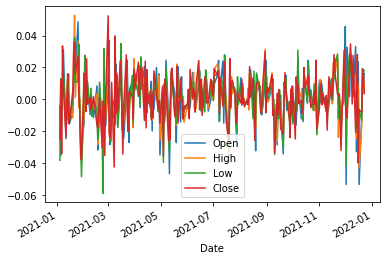

In [16]:
data_log_ratio[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

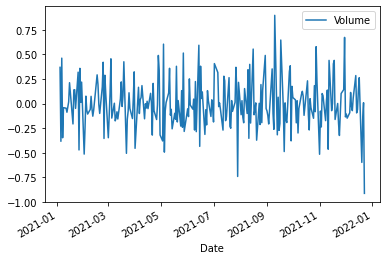

In [17]:
data_log_ratio[['Volume']].plot()

# Log Diff = Log(T) - Log(T-1)

In [18]:
data_log_diff = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258482,133.914441,130.912941,131.876999,99116600
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200


In [19]:
data_log_diff = data_log_diff + 1e-7
data_log_diff = data_log_diff.apply(np.log)
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,4.892291,4.897201,4.874533,4.881870,18.411807
2021-01-04,4.888105,4.888779,4.836150,4.856840,18.780464
2021-01-05,4.852813,4.874684,4.849238,4.869128,18.397053
2021-01-06,4.843695,4.869433,4.833147,4.834887,18.859503
2021-01-07,4.848693,4.873849,4.844790,4.868441,18.512149


In [20]:
data_log_diff_t = data_log_diff
data_log_diff_t_minus_1 = data_log_diff.shift(1)
data_log_diff = data_log_diff_t - data_log_diff_t_minus_1
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,-0.004185,-0.008422,-0.038383,-0.025030,0.368657
2021-01-05,-0.035292,-0.014095,0.013088,0.012288,-0.383411
2021-01-06,-0.009119,-0.005251,-0.016091,-0.034241,0.462450
2021-01-07,0.004998,0.004416,0.011643,0.033554,-0.347354


<AxesSubplot:xlabel='Date'>

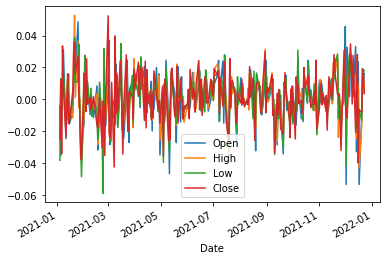

In [21]:
data_log_diff[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

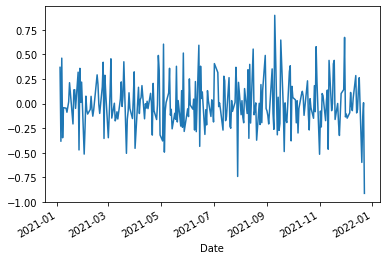

In [22]:
data_log_diff['Volume'].plot()

Now I realized that is the same thing. DUUUUUH!

# Difference Between the Mean = T - Mean

In [23]:
data_diff_mean = data.copy()
data_diff_mean = data_diff_mean.loc[(data_diff_mean.index > '2021-01-01') & (data_diff_mean.index < '2021-01-10')]
data_diff_mean.head()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900,-0.073139,-0.040633,0.000000,0.000000,0.000000
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900,-0.043882,-0.041964,33.538154,34.732134,33.656822
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000,-0.187745,-0.091348,17.143856,16.989412,17.130071
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200,-0.091116,-0.091279,44.591292,46.303228,44.762903
2021-01-08,131.618582,131.817369,129.432065,131.240921,105158200,0.016707,-0.062009,49.149407,51.218746,49.356709


In [24]:
data_diff_mean.tail()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900,-0.073139,-0.040633,0.000000,0.000000,0.000000
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900,-0.043882,-0.041964,33.538154,34.732134,33.656822
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000,-0.187745,-0.091348,17.143856,16.989412,17.130071
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200,-0.091116,-0.091279,44.591292,46.303228,44.762903
2021-01-08,131.618582,131.817369,129.432065,131.240921,105158200,0.016707,-0.062009,49.149407,51.218746,49.356709


<AxesSubplot:xlabel='Date'>

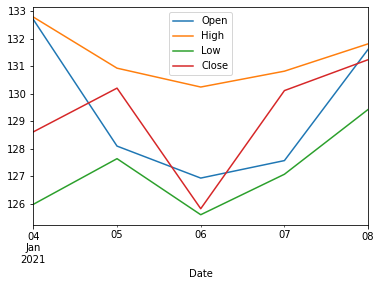

In [25]:
data_diff_mean[['Open', 'High', 'Low', 'Close']].plot()

In [26]:
average = data_diff_mean.mean(axis=0)

In [27]:
data_diff_mean = data_diff_mean / average
data_diff_mean.head()

,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2021-01-04,1.025625,1.011186,0.990839,0.995477,1.173084,0.964445,0.620852,0.000000,0.000000,0.000000
2021-01-05,0.990060,0.997033,1.003893,1.007785,0.799495,0.578647,0.641198,1.161111,1.163606,1.161329
2021-01-06,0.981073,0.991811,0.987869,0.973861,1.269566,2.475707,1.395765,0.593531,0.569184,0.591073
2021-01-07,0.985989,0.996201,0.999437,1.007092,0.897018,1.201505,1.394711,1.543777,1.551264,1.544544
2021-01-08,1.017252,1.003769,1.017963,1.015785,0.860836,-0.220303,0.947474,1.701582,1.715945,1.703054


<AxesSubplot:xlabel='Date'>

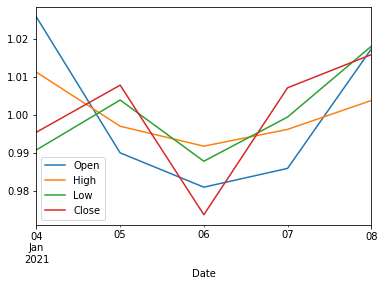

In [28]:
data_diff_mean[['Open', 'High', 'Low', 'Close']].plot()

This method looks exciting

<AxesSubplot:xlabel='Date'>

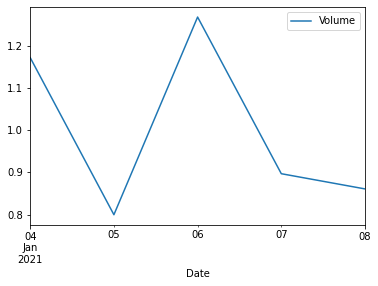

In [29]:
data_diff_mean[['Volume']].plot()

We should find another way to scale the volume

# Relative Values - T-N, T-N+1 ... T-1 / T

In [30]:
data_relative = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
data_relative = data_relative.loc[(data_relative.index > '2021-01-01') & (data_relative.index < '2021-01-10')]
data_relative.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,132.701930,132.791375,125.983346,128.617111,143301900
2021-01-05,128.100285,130.932829,127.643097,130.207291,97664900
2021-01-06,126.937466,130.247065,125.605672,125.824326,155088000
2021-01-07,127.573546,130.823515,127.076610,130.117859,109578200
2021-01-08,131.618582,131.817369,129.432065,131.240921,105158200


In [31]:
data_relative[['Open', 'High', 'Low', 'Close']] /= data['Close'].iloc[-1]
data_relative['Volume'] /= data['Volume'].iloc[-1]
data_relative.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,0.752837,0.753344,0.714721,0.729663,3.879890
2021-01-05,0.726731,0.742800,0.724137,0.738684,2.644271
2021-01-06,0.720134,0.738910,0.712579,0.713819,4.198998
2021-01-07,0.723743,0.742180,0.720924,0.738177,2.966823
2021-01-08,0.746691,0.747819,0.734286,0.744548,2.847152


<AxesSubplot:xlabel='Date'>

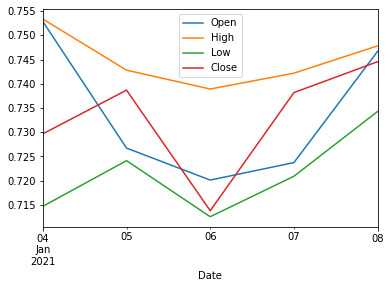

In [32]:
data_relative[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

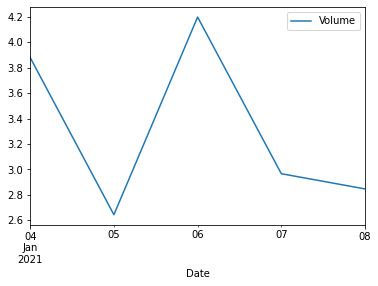

In [33]:
data_relative[['Volume']].plot()

# Normalization

In [34]:
data_for_norm = data.copy()
normalizer = preprocessing.Normalizer().fit(data_for_norm)

In [35]:
data_for_norm = normalizer.transform(data_for_norm)
data_for_norm[:5]

array([[ 1.34446179e-06,  1.35107985e-06,  1.32079733e-06,
         1.33052384e-06,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 9.26030499e-07,  9.26654670e-07,  8.79146377e-07,
         8.97525512e-07,  1.00000000e+00, -5.10380574e-10,
        -2.83544763e-10,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.31163074e-06,  1.34063342e-06,  1.30694954e-06,
         1.33320457e-06,  1.00000000e+00, -4.49307830e-10,
        -4.29674346e-10,  3.43400279e-07,  3.55625554e-07,
         3.44615333e-07],
       [ 8.18486705e-07,  8.39826841e-07,  8.09899362e-07,
         8.11309228e-07,  1.00000000e+00, -1.21056981e-09,
        -5.89006399e-10,  1.10542766e-07,  1.09546915e-07,
         1.10453878e-07],
       [ 1.16422378e-06,  1.19388268e-06,  1.15968879e-06,
         1.18744293e-06,  1.00000000e+00, -8.31514957e-10,
        -8.33001781e-10,  4.06935792e-07,  4.22558754e-07,
         4.

In [36]:
data_for_norm[-5:]

array([[8.69506447e-07, 8.87620144e-07, 8.68278453e-07, 8.75697871e-07,
        1.00000000e+00, 2.91134571e-08, 2.91766289e-08, 3.07812822e-07,
        2.89492603e-07, 3.07427024e-07],
       [1.56540844e-06, 1.58680400e-06, 1.55778055e-06, 1.57908299e-06,
        1.00000000e+00, 4.76863656e-08, 5.19716180e-08, 5.47722455e-07,
        5.04430774e-07, 5.45742310e-07],
       [1.88143120e-06, 1.89941643e-06, 1.85467265e-06, 1.89711354e-06,
        1.00000000e+00, 5.35698130e-08, 5.97294543e-08, 6.67669462e-07,
        6.42637843e-07, 6.67849052e-07],
       [1.88078567e-06, 1.91143656e-06, 1.87111220e-06, 1.90904535e-06,
        1.00000000e+00, 5.27300999e-08, 5.79046403e-08, 6.78556410e-07,
        6.72271977e-07, 6.80570960e-07],
       [4.76112852e-06, 4.77980988e-06, 4.74569561e-06, 4.77247805e-06,
        1.00000000e+00, 1.30503993e-07, 1.41493424e-07, 1.70007927e-06,
        1.69523026e-06, 1.70616289e-06]])

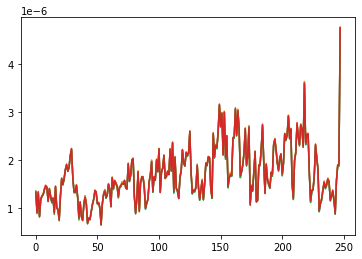

In [37]:
plt.plot(data_for_norm[:, :4])

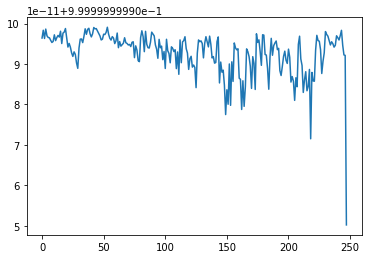

In [38]:
plt.plot(data_for_norm[:, 4])

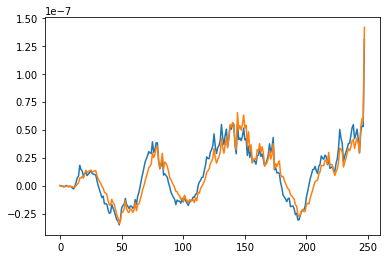

In [50]:
# macd & macds
plt.plot(data_for_norm[:, 5:7])

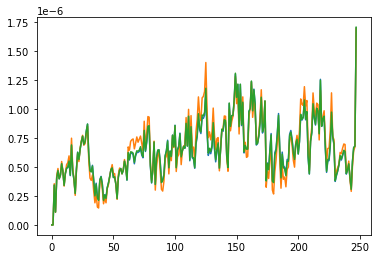

In [51]:
# RSI Stuff
plt.plot(data_for_norm[:, 7:])

# Robust Scaler

<AxesSubplot:xlabel='Date'>

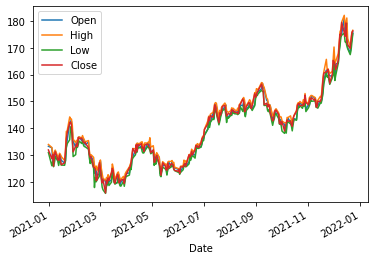

In [39]:
data_for_scaling = data.copy()
normalizer = preprocessing.RobustScaler().fit(data_for_scaling)
data_for_scaling[['Open', 'High', 'Low', 'Close']].plot()

In [40]:
data_for_scaling = normalizer.transform(data_for_scaling)
data_for_scaling[:5]

array([[-0.27838468, -0.36708543, -0.27441195, -0.36011401,  0.32995159,
        -0.31198232, -0.34251819, -4.28799398, -2.82476259, -4.09557732],
       [-0.30553074, -0.42400765, -0.51215104, -0.51950516,  1.50474027,
        -0.33542676, -0.35743686, -4.28799398, -2.82476259, -4.09557732],
       [-0.52997806, -0.51820739, -0.43210642, -0.44175385,  0.29135412,
        -0.3260485 , -0.35792577, -1.63815706, -1.04820746, -1.56435296],
       [-0.58669507, -0.55296507, -0.53036508, -0.6560575 ,  1.81810641,
        -0.37216365, -0.37605755, -2.93346433, -1.95575101, -2.80727823],
       [-0.55566998, -0.52374789, -0.45942632, -0.44612659,  0.60810222,
        -0.34118939, -0.37603222, -0.76485281, -0.45634388, -0.72909935]])

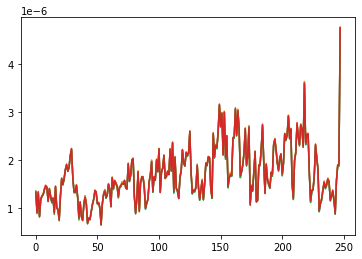

In [41]:
plt.plot(data_for_norm[:, :4])

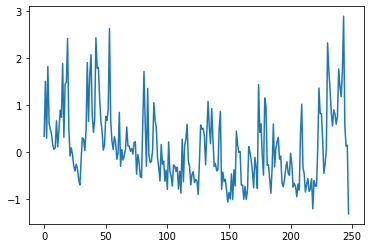

In [42]:
plt.plot(data_for_scaling[:, 4])

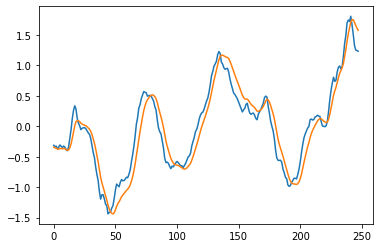

In [53]:
# macd & macds
plt.plot(data_for_scaling[:, 5:7])

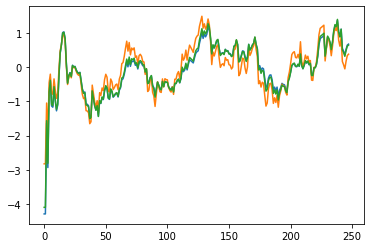

In [54]:
# macd & macds
plt.plot(data_for_scaling[:, 7:])

# Fixed-Width Window Fracdiff

In [43]:
data_diff = data.copy()
data_diff = data_diff.apply(np.log)
print(f'Data length: {len(data_diff)}')
data_diff.head()

Data length: 248


,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
Date,,,,,,,,,,
2020-12-31,4.892291,4.897201,4.874533,4.881870,18.411807,-inf,-inf,-inf,-inf,-inf
2021-01-04,4.888105,4.888779,4.836150,4.856840,18.780464,NaN,NaN,-inf,-inf,-inf
2021-01-05,4.852813,4.874684,4.849238,4.869128,18.397053,NaN,NaN,3.512684,3.547665,3.516216
2021-01-06,4.843695,4.869433,4.833147,4.834887,18.859503,NaN,NaN,2.841640,2.832590,2.840835
2021-01-07,4.848693,4.873849,4.844790,4.868441,18.512149,NaN,NaN,3.797539,3.835212,3.801380


In [44]:
def get_weights_ffd(d, thres):
    w, k = [1.], 1
    while True:
        w_ = -w[-1] / k * (d - k + 1)
        if abs(w_) < thres:
            break
        w.append(w_)
        k += 1
        
    return np.array(w[::-1]).reshape(-1, 1)


def frac_diff_ffd(series, d, thres=1e-3):
    # Constant width window
    w = get_weights_ffd(d, thres)
    width = len(w) - 1
    print(f'Width weights: {width}')
    df = {}
    for name in series.columns:
        seriesF = series[name].fillna(method='ffill').dropna()
        df_ = pd.Series(dtype=np.float32)
        for iloc1 in range(width, seriesF.shape[0]):
            loc0 = seriesF.index[iloc1 - width]
            loc1 = seriesF.index[iloc1]
            if not np.isfinite(series.loc[loc1, name]):
                # Exclude NaNs
                continue
                
            df_[loc1] = np.dot(w.T, seriesF.loc[loc0:loc1])[0]
        df[name] = df_.copy(deep=True)
    df = pd.concat(df, axis=1)
    
    return df

In [45]:
data_diff = frac_diff_ffd(data_diff, 1.25)
data_diff.head()

Width weights: 12


,Open,High,Low,Close,Volume,macd,macds,rsi_30,rsi_12,rsi_26
2021-01-20,-0.035320,-0.012594,-0.031103,-0.012231,0.005133,NaN,NaN,-inf,-inf,-inf
2021-01-21,-0.006361,0.001911,-0.008957,-0.016515,-0.052605,-inf,NaN,-inf,-inf,-inf
2021-01-22,-0.036367,-0.058825,-0.044609,-0.040625,-0.261425,-inf,NaN,-0.045197,-0.052363,-0.045825
2021-01-25,-0.004512,-0.014535,-0.040333,-0.026457,0.144708,-inf,-inf,-0.004560,-0.007694,-0.004701
2021-01-26,-0.057177,-0.063361,-0.016236,-0.054503,-0.727480,-inf,-inf,-0.069394,-0.073560,-0.069874


<AxesSubplot:>

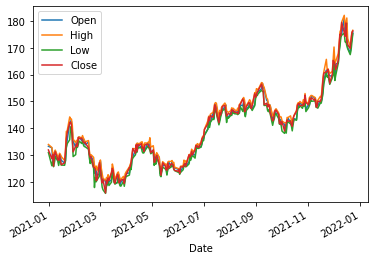

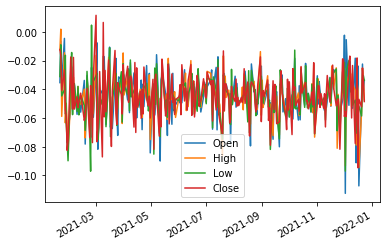

In [46]:
data[['Open', 'High', 'Low', 'Close']].plot()
data_diff[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:>

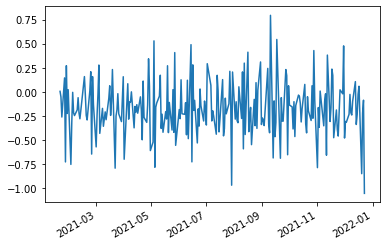

In [47]:
data_diff['Volume'].plot()